<br><br>

<div style="text-align: center;">
    <img src="https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_CMYK_Green.png" width="50%" center>
</div>

<br><br>

# What makes a Song Popular on Spotify?


Let's learn more about what makes a song popular. My intuition is that shorter, vocal and more energetic songs are more popular among the general population. These are the kind of songs you hear most frequently when tuning into the radio or checking the top tracks of the month. Is it possible to prove this statistically? Moreover, is your music taste more in line with the general public's, or you've developed a unique taste of your own?

The dataset can be downloaded [here](https://www.kaggle.com/akiboy96/spotify-dataset) while the feature descriptions are taken from Spotify's developer [page](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features). A summary of the song descriptions are in the table below. 

<br><br>

| **Feature**        	| **Description**                                                                                                                                                                                                                                                                                                                                                                                    	|
|--------------------	|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| `track`            	| Track name                                                                                                                                                                                                                                                                                                                                                                                         	|
| `artist`           	| Artist name                                                                                                                                                                                                                                                                                                                                                                                        	|
| `uri`              	| URI for the track                                                                                                                                                                                                                                                                                                                                                                                  	|
| `danceability`     	| Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.                                                                                                                                                       	|
| `energy`           	| Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.                                                                                                                                                                                                                                         	|
| `key`              	| The key the track is in. Integers map to pitches using standard Pitch Class notation.                                                                                                                                                                                                                                                                                                              	|
| `loudness`         	| The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.                                                                                                                                                                                                                                   	|
| `mode`             	| Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.                                                                                                                                                                                                                                    	|
| `speechiness`      	| Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.                                                                                                                                                                                                           	|
| `acousticness`     	| A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.                                                                                                                                                                                                                                                                       	|
| `instrumentalness` 	| Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 	|
| `liveness`         	| Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.                                                                                                                                                                                                                                                 	|
| `valence`          	| A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric).                                                                                                                                                                                                                                  	|
| `tempo`            	| The overall estimated tempo of a track in beats per minute (BPM).                                                                                                                                                                                                                                                                                                                                  	|
| `duration_ms`      	| Duration in milliseconds                                                                                                                                                                                                                                                                                                                                                                           	|
| `time_signature`   	| An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7.                                                                                                                                                                                                                  	|
| `chorus_hit`       	| This the the author's best estimate of when the chorus would start for the track. It's the timestamp of the start of the third section of the track.                                                                                                                                                                                                                                               	|
| `sections`         	| Number of sections in a songs                                                                                                                                                                                                                                                                                                                                                                      	|
| `popularity`       	| Song popularity, with popular songs (1) and unpopular songs (0)                                                                                                                                                                                                                                                                                                                                    	|
| `decade`           	| Decade                                                                                                                                                                                                                                                                                                                                                                                             	|


<br><br>

More specifically, I'm interested in finding out which attributes are most different between popular and unpopular songs and whether we can confirm this statistically. 


<br><br>


<a name="top"></a>

## Index


- [Initial data exploration](#exploration)
    - [Correlation Matrix](#correlation-matrix)
- [Instrumentalness](#instrumentalness)
- [Danceability](#danceability)
- [Energy](#energy)
- [Duration](#duration)
- [Speechiness](#speechiness)
- **[Conclusions](#conclusions)**


<br>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats

<a name="exploration"></a>

## [Initial data exploration](#top)

Load the data, decode the `mode` and `popularity` columns for ease of understanding, and delete two columns we're not interested in. Finally, display some statistics to make an initial verification that the data is okay. 

In [112]:
# Load the data into pandas. 
spotify = pd.read_csv('Spotify/spotify_dataset.csv')

# Decode mode and popularity to facilitate interpretation. Convert duration_ms to seconds
spotify['mode'] = spotify['mode'].apply(lambda x: 'Major' if x == 1 else 'Minor')
spotify['popularity'] = spotify['popularity'].apply(lambda x: 'Popular' if x == 1 else 'Unpopular')
spotify['duration'] = spotify['duration_ms'] / 1000

# Remove the uri column
spotify.drop(['uri'], axis=1, inplace=True)

# Display some statistics
display(spotify.head())
spotify.info()
display(spotify.describe())

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade,duration
0,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,Major,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,Popular,60s,173.533
1,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,Major,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,Unpopular,60s,213.613
2,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,Major,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,Unpopular,60s,223.960
3,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,Minor,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,Unpopular,60s,157.907
4,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,Minor,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,Unpopular,60s,245.600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41099 entries, 0 to 41098
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41099 non-null  object 
 1   artist            41099 non-null  object 
 2   danceability      41099 non-null  float64
 3   energy            41099 non-null  float64
 4   key               41099 non-null  int64  
 5   loudness          41099 non-null  float64
 6   mode              41099 non-null  object 
 7   speechiness       41099 non-null  float64
 8   acousticness      41099 non-null  float64
 9   instrumentalness  41099 non-null  float64
 10  liveness          41099 non-null  float64
 11  valence           41099 non-null  float64
 12  tempo             41099 non-null  float64
 13  duration_ms       41099 non-null  int64  
 14  time_signature    41099 non-null  int64  
 15  chorus_hit        41099 non-null  float64
 16  sections          41099 non-null  int64 

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,duration
count,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,4.109900e+04,41099.000000,41099.000000,41099.000000,41099.000000
mean,0.539683,0.579544,5.213752,-10.221446,0.072952,0.364232,0.154403,0.201534,0.542450,119.336349,2.348755e+05,3.893647,40.106896,10.475632,234.875505
std,0.177808,0.252629,3.535060,5.311227,0.086106,0.338908,0.303518,0.172957,0.267333,29.099116,1.189696e+05,0.423072,19.006697,4.872026,118.969563
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,15.168000
25%,0.420000,0.396000,2.000000,-12.816500,0.033700,0.039400,0.000000,0.094000,0.330000,97.395500,1.729165e+05,4.000000,27.599510,8.000000,172.916500
50%,0.552000,0.601000,5.000000,-9.257000,0.043400,0.258000,0.000120,0.132000,0.559000,117.564000,2.179070e+05,4.000000,35.850270,10.000000,217.907000
75%,0.669000,0.787000,8.000000,-6.375000,0.069800,0.676000,0.061200,0.261000,0.768000,136.492000,2.667730e+05,4.000000,47.627240,12.000000,266.773000
max,0.988000,1.000000,11.000000,3.744000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,4170.227000


All columns seem to have a reasonable range. Max duration (`duration_ms`) is very high at `4.17e6`, but converted into something more comprehensible it's actually no more than 70 minutes (around 4000 seconds) - well within what's plausible for a song length. 

Display what decades most songs are from based on popularity and mode.  

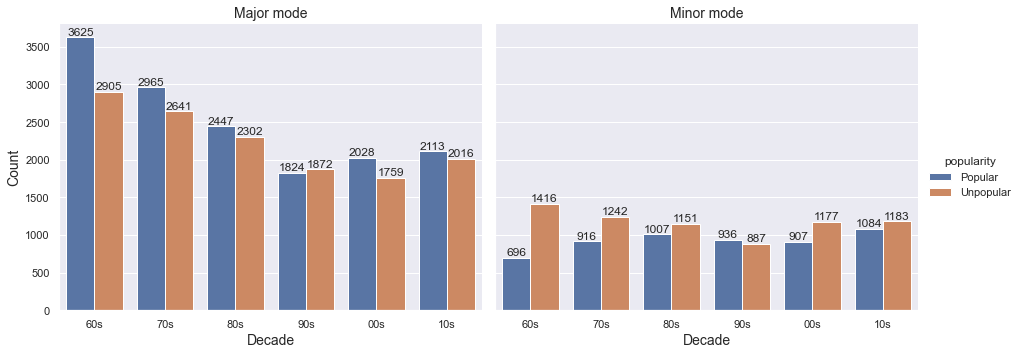

In [113]:
# Plot song popularity by decade and mode
g = sns.catplot(x='decade', hue='popularity', col='mode', 
                data=spotify, kind='count', aspect=1.3)
for ax in g.axes.ravel():
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
(g.set_axis_labels("Decade", "Count", size=14)
  .set_titles("{col_name} {col_var}", size=14));

The data consist of most songs from the 60s and 70s. Major mode is more frequent than Minor mode. 

Let's se what features are most correlated with popular songs by calculating the correlation between each feature and the popularity. This can then be displayed in something referred to as a correlation matrix.  

<br>

<a name="correlation-matrix"></a>


### [Correlation matrix](#top)

In order to facilitate interpretation of the correlation matrix, I will rearrange the column order so popularity ends up in the first position. Columns need to be converted to numerical as well. 

In [118]:
# Rearrange the column order
cols = list(spotify.columns)
cols.remove("popularity")
cols.insert(0, "popularity")
spotify = spotify[cols]

# Convert popularity and decade to numeric
spotify["popularity"] = spotify["popularity"].apply(lambda x: 1 if x=="Popular" else 0 if x=="Unpopular" else x)
spotify["decade"] = spotify["decade"].apply(lambda x: x.strip("s")).astype(int)
spotify.head()

,popularity,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,duration
0,1,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,Major,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,60,173.533
1,0,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,Major,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,60,213.613
2,0,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,Major,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,60,223.960
3,0,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,Minor,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,60,157.907
4,0,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,Minor,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,60,245.600


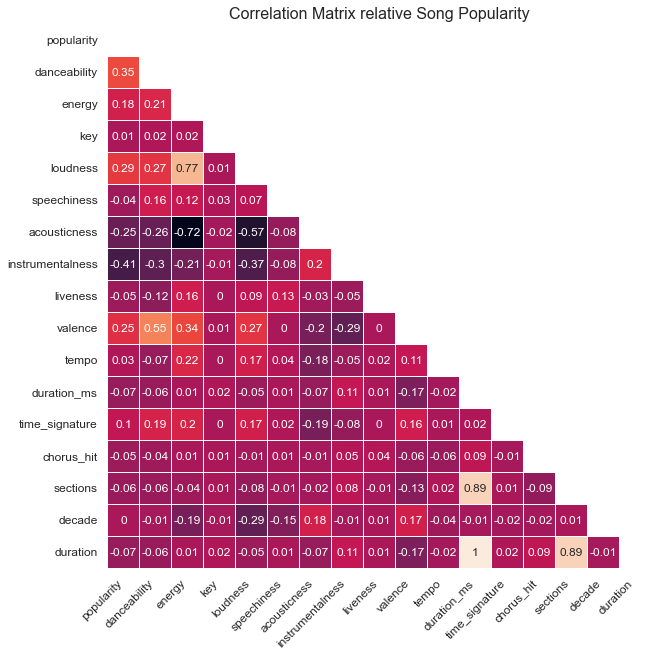

In [119]:
# Calculate correlation matrix
corr = spotify.corr()

# Create mask to remove the mirrored diagonal of the matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot correlation matrix
plt.figure(figsize=(10, 10))
with sns.axes_style('white'):
    sns.heatmap(np.round(corr, 2), square=True, annot=True, 
                cbar=False, linewidth=.5, mask=mask)
plt.title("Correlation Matrix relative Song Popularity", size=16)
plt.xticks(rotation=45, horizontalalignment='right', size=12)
plt.yticks(size=12);

The features that are most correlated with song popularity when considering both popular and unpopular songs are:

- `instrumentalness` (-0.41)
- `danceability` (0.35)
- `loudness` (0.29)
- `valence` (0.25) and `acousticness` (-0.25)
- `energy` (0.20)


Features such as `decade`, `duration`, `tempo`, `liveness` and `speechiness` have only minor impact. 

We can additionally confirm this using A/B tests. We won't cover all of the features but will instead focus on some few in each group; highly and minor correlated. For the purpose of this notebook we choose to test `instrumentalness`, `danceability` and `energy` among the highly correlated features and `duration` and `speechiness` among the feaures with low to little correlation. 


Since we will conduct the analysis based on popular and unpopular songs, we will split the data into these two groups.

In [120]:
# Undo the convertion on popularity and decade to facilitate interpretation
spotify["popularity"] = spotify["popularity"].apply(lambda x: "Popular" if x==1 else "Unpopular" if x==0 else x)
spotify["decade"] = spotify["decade"].apply(lambda x: str(x)+'s')

# Split data into popular and unpopular songs
popular = spotify[spotify['popularity'] == 'Popular']
unpopular = spotify[spotify['popularity'] == 'Unpopular']

# Display the result
display(popular.head())
display(unpopular.head())

print(f"Number of popular songs:   {len(popular)}")
print(f"Number of unpopular songs: {len(unpopular)}")

,popularity,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,duration
0,Popular,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,Major,0.0403,0.4900,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,60s,173.533
7,Popular,Happy Days,Marv Johnson,0.720,0.624,5,-9.086,Minor,0.0473,0.7950,0.000000,0.4880,0.887,119.999,160040,4,30.42891,8,60s,160.040
9,Popular,I Can Hear Music,The Beach Boys,0.511,0.603,2,-7.637,Major,0.0280,0.0385,0.000002,0.1420,0.685,128.336,157293,4,43.36534,9,60s,157.293
11,Popular,Ride Away,Roy Orbison,0.520,0.411,9,-12.411,Major,0.0315,0.7860,0.001200,0.1460,0.350,120.290,207573,4,37.54527,9,60s,207.573
13,Popular,P.T. 109,Jimmy Dean,0.746,0.666,2,-10.408,Major,0.1460,0.5430,0.000000,0.0488,0.840,94.024,192427,4,78.59848,5,60s,192.427


,popularity,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,duration
1,Unpopular,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,Major,0.0337,0.018,0.107000,0.176,0.797,101.801,213613,4,48.82510,10,60s,213.613
2,Unpopular,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,Major,0.0380,0.846,0.000004,0.119,0.908,115.940,223960,4,37.22663,12,60s,223.960
3,Unpopular,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,Minor,0.1040,0.706,0.024600,0.061,0.967,105.592,157907,4,24.75484,8,60s,157.907
4,Unpopular,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,Minor,0.1240,0.857,0.000872,0.213,0.906,114.617,245600,4,21.79874,14,60s,245.600
5,Unpopular,Beat n. 3,Ennio Morricone,0.697,0.673,0,-10.573,Major,0.0266,0.714,0.919000,0.122,0.778,112.117,167667,4,65.48604,7,60s,167.667


Number of popular songs:   20548
Number of unpopular songs: 20551


With around 20.000 songs in each group, the dataset is more than large enough for hypothesis testing.

<br><br>

<a name="instrumentalness"></a>


## [Instrumentalness](#top)

Instrumentalness was highly *negatively* correlated with song popularity. This means that songs that are popular have in general lower instrumentalness. This maks intuitive sense as most songs you hear on the popular radio stations are not instrumental. Let's very this statistically using an A/B test. 

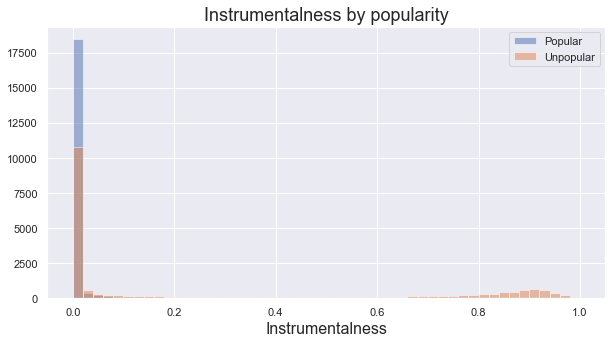

DescribeResult(nobs=20548, minmax=(0.0, 0.982), mean=0.03069373979560055, variance=0.016857409891644796, skewness=5.196960615518452, kurtosis=27.571067970038175)
DescribeResult(nobs=20551, minmax=(0.0, 1.0), mean=0.27809455669359157, variance=0.13677959632311393, skewness=0.824903938676398, kurtosis=-1.1009584684730493) 

ShapiroResult(statistic=0.25121474266052246, pvalue=0.0)
ShapiroResult(statistic=0.7122498750686646, pvalue=0.0)


In [122]:
# Plot instrumentalness by popularity
plt.figure(figsize=(10,5))
plt.hist(popular['instrumentalness'], alpha=.5, bins=50, label='Popular')
plt.hist(unpopular['instrumentalness'], alpha=.5, bins=50, label='Unpopular')

plt.xlabel('Instrumentalness', size=16)
plt.title('Instrumentalness by popularity', size=18)
plt.legend(loc='best')
plt.show();

# Calculate skewness and kurtosis
print(stats.describe(popular['instrumentalness']))
print(stats.describe(unpopular['instrumentalness']), '\n')

# Test for normality
print(stats.shapiro(popular['instrumentalness']))
print(stats.shapiro(unpopular['instrumentalness']))

Both skewness and kurtosis are above the threshold of ±3 for popular songs which indicates non-normality. A visual inspection confirms this. Although unpopular songs have acceptable values, we choose a Kruskal-Wallis test for testing the null hypothesis.


**State the null and alternative hypothesis**

- The *null* hypothesis is that there is *no* significant difference, on average, in instrumentalness between popular and unpopular songs. 
- The *alternative* hypothesis is that there *is* a significant difference, on average, in instrumentalness between popular and unpopular songs. 


#### Test the *null* hypothesis

In [123]:
# Test the null hypothesis with Kruskal-Wallis test
stats.kruskal(popular['instrumentalness'],
              unpopular['instrumentalness'])

KruskalResult(statistic=7265.829685757234, pvalue=0.0)

We can choose a confidence level of 99% for the confidence interval due to the low p-value. The high t-statistics indicate a large difference between the groups. Let's calculate the confidence interval. 

In [124]:
def get_ci(array_1, array_2, cl=0.95):
    """ Function for calculating the difference in means between two distributions.
        cl is confidence level. Deafult is 95%
    """
    
    # Get z score depending on the confidence level
    if cl == 0.90:
        z = 1.645
    elif cl == 0.95:
        z = 1.96
    elif cl == 0.99:
        z = 2.58
    else:
        raise Exception("Specify an adequate confidence level (0.90, 0.95 or 0.99)")
    
    # Calculate Margin of Error
    MOE = z * math.sqrt((array_1.var()/len(array_1))+(array_2.var()/len(array_2)))
    
    # Lower and Upper confidence intervals
    mean1 = array_1.mean()
    mean2 = array_2.mean()
    mean_diff = mean2 - mean1
    ci_lower = mean_diff - MOE
    ci_upper = mean_diff + MOE
    
    print("The difference in means at the {:.0%} confidence level (two-tail) is between {:.3f} and {:.3f}.".format(
        cl, ci_lower, ci_upper))
    print(f"\nMeans:\n{mean1:.5f}\n{mean2:.5f}")

In [125]:
# Calculate confidence interval
get_ci(popular['instrumentalness'], unpopular['instrumentalness'], cl=0.99)

The difference in means at the 99% confidence level (two-tail) is between 0.240 and 0.254.

Means:
0.03069
0.27809


We reject the null. There *is* a significant difference in mean between the two groups. *With 99% confidence, popular songs have between 0.24 and 0.25 points lower instrumentalness than unpopular songs*. Although the numbers are not equal to before, it confirms our earlier observations. 


#### Visualise the difference in instrumentalness

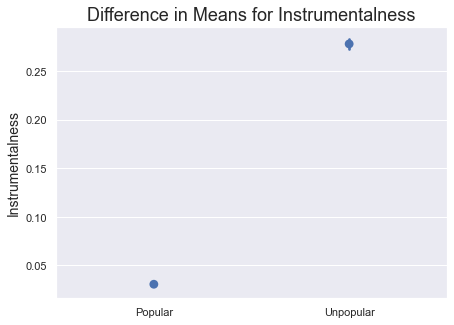

In [155]:
plt.figure(figsize=(7, 5))
p = sns.pointplot(data=[popular['instrumentalness'], 
                        unpopular['instrumentalness']],
                 join=False)
p.set(xticklabels=['Popular', 'Unpopular'])
plt.ylabel('Instrumentalness', size=14)
plt.title('Difference in Means for Instrumentalness', size=18);

Visually the difference is clear, with means at around 0.03 and 0.28. Unpopular songs are on average far more instrumental (around 8 times more) than those that are popular. 

<br><br>

<a name="danceability"></a>


## [Danceability](#top)


Danceability was positively correlated with song popularity. That means that popular songs tend to be more danceable. This also makese sense based on the songs you hear on mainstram radio stations. 

Start by displaying danceability by popularity using a histogram for an initial visual inspection.

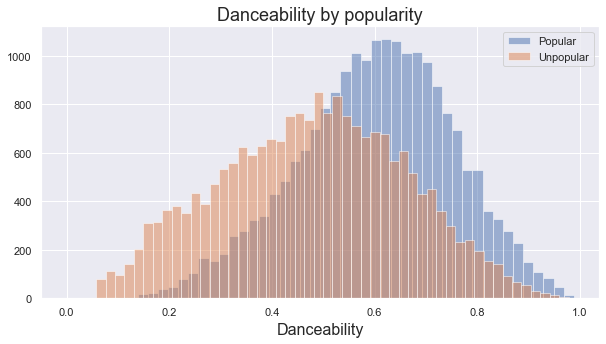

In [129]:
# Plot danceability by popularity
plt.figure(figsize=(10,5))
plt.hist(popular['danceability'], alpha=.5, bins=50, label='Popular')
plt.hist(unpopular['danceability'], alpha=.5, bins=50, label='Unpopular')

plt.xlabel('Danceability', size=16)
plt.title('Danceability by popularity', size=18)
plt.legend(loc='best')

plt.show();

Both distributions seem to be close to normally distributed by a visual inspection. Let's calculate some statistics and test for normality using the Shapiro-Wilk test. Although the p-value may not be accurate for samples larger than 5000, the test statistics should be accurate and help us provide some indications on where to go next. 

In [132]:
# Calculate skewness and kurtosis
print(stats.describe(popular['danceability']))
print(stats.describe(unpopular['danceability']), '\n')

# Test for normality
print(stats.shapiro(popular['danceability']))
print(stats.shapiro(unpopular['danceability']))

DescribeResult(nobs=20548, minmax=(0.0, 0.988), mean=0.6012118357017714, variance=0.02295889458127986, skewness=-0.2524126963655955, kurtosis=-0.21990301465001094)
DescribeResult(nobs=20551, minmax=(0.0576, 0.978), mean=0.47816293124422166, variance=0.03270260210418598, skewness=-0.025951179048799358, kurtosis=-0.5963915009919534) 

ShapiroResult(statistic=0.994170069694519, pvalue=1.1722831274553891e-27)
ShapiroResult(statistic=0.992752730846405, pvalue=1.5046010777248298e-30)


Both skewness and kurtosis are well below the threshold of ±3 for normality, while the test statistics is very close to 1. Great! We can more forward with an independet t-test.

**State the null and alternative hypothesis**

- The *null* hypothesis is that there is *no* significant difference in danceability, on average, between popular and unpopular songs.
- The *alternative* hypothesis is that there *is* a significant difference in danceability, on average, between popular and unpopular songs.


#### Test the *null* hypothesis

In [133]:
# Conduct the t-test
stats.ttest_ind(popular['danceability'],
                unpopular['danceability'])

Ttest_indResult(statistic=74.76497030046097, pvalue=0.0)

The p-value is very low. We can thus go with a 99% confidence level when calculating the confidence interval.

In [134]:
# Calculate confidence interval and means
get_ci(popular['danceability'], unpopular['danceability'], cl=0.99)

The difference in means at the 99% confidence level (two-tail) is between -0.127 and -0.119.

Means:
0.60121
0.47816


*We can reject the null. With 99% confidence, popular songs have on average between 0.12 and 0.13 higher danceability scores than unpopular songs.* This is equivalent to a difference of around 25%.


#### Visualise the difference in danceability

It can be difficult to imagine this average difference just looking at the numbers. Below plot makes this slightly clearer.

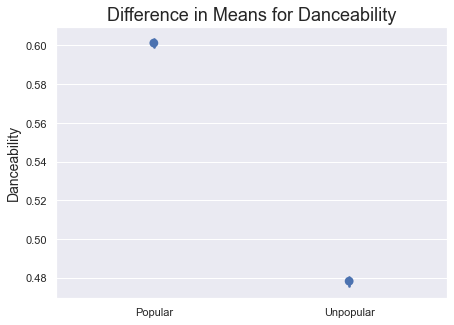

In [156]:
plt.figure(figsize=(7, 5))
p = sns.pointplot(data=[popular['danceability'], 
                        unpopular['danceability']],
                 join=False)
p.set(xticklabels=['Popular', 'Unpopular'])
plt.ylabel('Danceability', size=14)
plt.title('Difference in Means for Danceability', size=18);

Here we can visually see that the average danseability for popular songs is significantly higher (at 0.60) compared with unpopular (0.48) songs. Note the small confidence intervals (vertical lines through the dots which you barely see) - they're a result of the large sample size which allows us to calculate the difference more accurately. 


<br><br>

<a name="energy"></a>


## [Energy](#top)


The energy level had a fairly high positive correlation among popular songs. This means that popular songs have in general higher enery level than those that are not. 


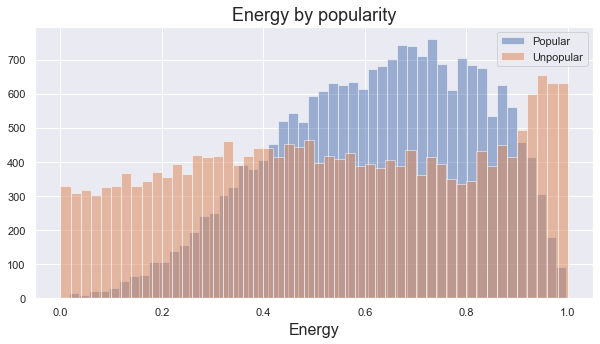

DescribeResult(nobs=20548, minmax=(0.0181, 0.997), mean=0.6242916488222697, variance=0.03940703746274093, skewness=-0.3484507320013295, kurtosis=-0.5913161577042674)
DescribeResult(nobs=20551, minmax=(0.000251, 1.0), mean=0.5348029597586493, variance=0.08423108898177896, skewness=-0.0645874449705946, kurtosis=-1.1823820620299565) 

ShapiroResult(statistic=0.97867751121521, pvalue=0.0)
ShapiroResult(statistic=0.9531692266464233, pvalue=0.0)


In [140]:
# Plot energy by popularity
plt.figure(figsize=(10,5))
plt.hist(popular['energy'], alpha=.5, bins=50, label='Popular')
plt.hist(unpopular['energy'], alpha=.5, bins=50, label='Unpopular')

plt.xlabel('Energy', size=16)
plt.title('Energy by popularity', size=18)
plt.legend(loc='best')
plt.show();

# Calculate skewness and kurtosis
print(stats.describe(popular['energy']))
print(stats.describe(unpopular['energy']), '\n')

# Test for normality
print(stats.shapiro(popular['energy']))
print(stats.shapiro(unpopular['energy']))


A visual inspection seem to indicate that the most energetic songs are unpopular (energy level at or close to 1). Popular songs are still clustered in the higher end with most energetic songs scoring around 0.5 and 0.8. Popular songs are fairly normally distributed, while unpopular are not.

Although skewness and kurtosis indicate that both distributions are normal, the unpopular songs visuals are not convincing. We will thus go with Kruskal-Wallis non-parametric test to be on the safe side. The sample size is with good margin large enough. 

<br>

**State the null and alternative hypothesis**

- The *null* hypothesis is that there is *no* significant difference, on average, in energy level between popular and unpopular songs. 
- The *alternative* hypothesis is that there *is* a significant difference, on average, in energy level between popular and unpopular songs. 


#### Test the *null* hypothesis

In [141]:
# Run t-test
stats.kruskal(popular['energy'],
              unpopular['energy'])

KruskalResult(statistic=904.2689008936939, pvalue=1.15828492943128e-198)

In [142]:
# Calculate confidence interval. We use a 99% confidence level du to the very low p-value
get_ci(popular['energy'], unpopular['energy'], cl=.99)

The difference in means at the 99% confidence level (two-tail) is between -0.096 and -0.083.

Means:
0.62429
0.53480


*We reject the null. With 99% confidence, popular songs have on average between 0.08 and 0.1 higher energy level than unpopular songs.* A difference of around 17%. 


#### Visualise the difference in energy level

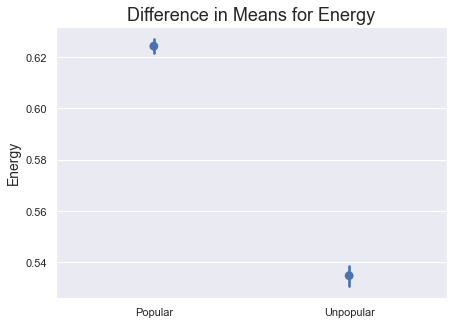

In [157]:
plt.figure(figsize=(7, 5))
p = sns.pointplot(data=[popular['energy'], 
                        unpopular['energy']],
                 join=False)
p.set(xticklabels=['Popular', 'Unpopular'])
plt.ylabel('Energy', size=14)
plt.title('Difference in Means for Energy', size=18);

Above pointplot visually displays how the average energy level for popular songs (0.62) is significantly higher than for unpopular songs (0.53). 

<br><br>


<a name="duration"></a>


## [Duration](#top)


Duration had a very low negative correlation with song popularity. 

Start by plotting the duration distribution, split by popularity. As the right tail is very long (the longest song is around 70 minutes, or over 4000 seconds), we can limit the x-axis at 1000 seconds to help with interpretation.  

In [162]:
print(f"Number of songs that are longer than 1,000 seconds: {spotify[spotify['duration']>1000].shape[0]}")

Number of songs that are longer than 1,000 seconds: 134


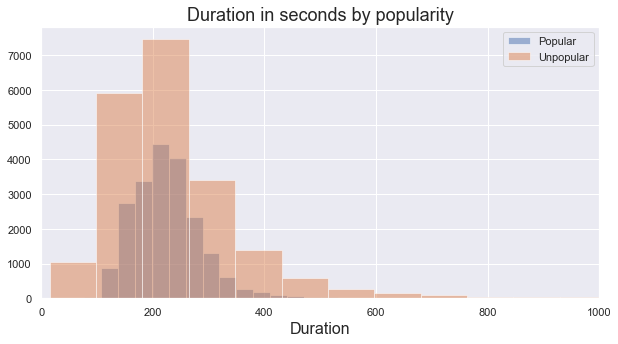

DescribeResult(nobs=20548, minmax=(46.893, 1561.133), mean=226.09435414638892, variance=4327.174919910735, skewness=2.231968165242757, kurtosis=21.221058623337363)
DescribeResult(nobs=20551, minmax=(15.168, 4170.227), mean=243.65537423969636, variance=23825.402318643053, skewness=5.933831818977015, kurtosis=83.22764209773909) 

ShapiroResult(statistic=0.8957380056381226, pvalue=0.0)
ShapiroResult(statistic=0.6636985540390015, pvalue=0.0)


In [144]:
# Plot duration by popularity
plt.figure(figsize=(10,5))
plt.hist(popular['duration'], alpha=.5, bins=50, label='Popular')
plt.hist(unpopular['duration'], alpha=.5, bins=50, label='Unpopular')

plt.xlabel('Duration', size=16)
plt.xlim(xmin=0, xmax=1000)
plt.title('Duration in seconds by popularity', size=18)
plt.legend(loc='best')
plt.show();

# Calculate skewness and kurtosis
print(stats.describe(popular['duration']))
print(stats.describe(unpopular['duration']), '\n')

# Test for normality
print(stats.shapiro(popular['duration']))
print(stats.shapiro(unpopular['duration']))

Both skewness, kurtosis and a visual inspection indicate that neither of the distributions are normal. 


**State the null and alternative hypothesis**

- The *null* hypothesis is that there is *no* significant difference in mean song duration between popular and unpopular songs.  
- The *alternative* hypothesis is that there *is* a significant difference in mean song duration between popular and unpopular songs.  

Use the Kruskal-Wallis test to test the null.

#### Test the *null* hypothesis

In [145]:
# Test the null
stats.kruskal(popular['duration'],
              unpopular['duration'])

KruskalResult(statistic=18.9782431636515, pvalue=1.3221751844007864e-05)

In [146]:
# Calculate confidence interval with a 99% confidence level
get_ci(popular['duration'], unpopular['duration'], cl=0.99)

The difference in means at the 99% confidence level (two-tail) is between 14.541 and 20.581.

Means:
226.09435
243.65537


We reject the null. There is a significant difference in duration between popular and unpopular songs. *With 99% confidence, popular songs are on average between 15 and 21 seconds shorter than unpopular songs.* 

This is not much, but I still find it reasonable that popular songs are at least slightly shorter than unpopular songs, on average. Few songs that are played on mainstream media platoforms are very long. Let's visually display this difference below. 


#### Visualise the difference in duration

A plot helps us visually understand the difference in means. The average duration for popular songs is 226 seconds (less than 4 minutes) while 244 for unpopular. 

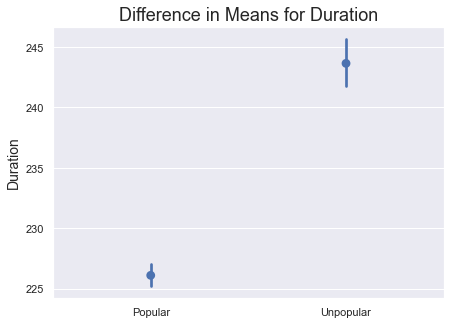

In [158]:
plt.figure(figsize=(7, 5))
p = sns.pointplot(data=[popular['duration'], 
                        unpopular['duration']],
                 join=False)
p.set(xticklabels=['Popular', 'Unpopular'])
plt.ylabel('Duration', size=14)
plt.title('Difference in Means for Duration', size=18);

We initially found a weak negative correlation for song duration using a correlation matrix. The A/B test verifies these results by confirming that there *is* a difference. However, the difference is fairly small at around 8%. 



<br><br>

<a name="speechiness"></a>


## [Speechiness](#top)


Speechines had a very weak negative correlation in our initial analysis. 

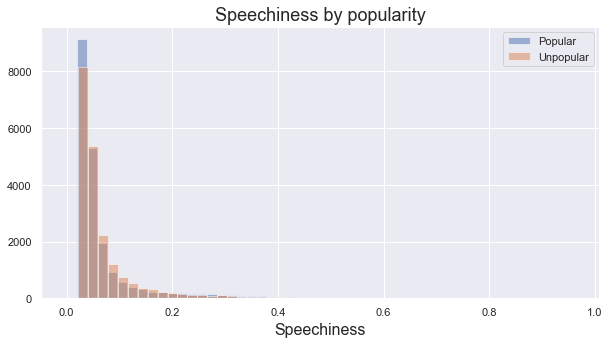

DescribeResult(nobs=20548, minmax=(0.0, 0.95), mean=0.06942718512750633, variance=0.005906813763293316, skewness=3.2974065853613164, kurtosis=13.700040400575247)
DescribeResult(nobs=20551, minmax=(0.0223, 0.96), mean=0.07647677485280521, variance=0.008897069031855826, skewness=5.1384851470838315, kurtosis=34.92671700665262) 

ShapiroResult(statistic=0.5644060373306274, pvalue=0.0)
ShapiroResult(statistic=0.47629427909851074, pvalue=0.0)


In [148]:
# Plot speechiness by popularity
plt.figure(figsize=(10,5))
plt.hist(popular['speechiness'], alpha=.5, bins=50, label='Popular')
plt.hist(unpopular['speechiness'], alpha=.5, bins=50, label='Unpopular')

plt.xlabel('Speechiness', size=16)
plt.title('Speechiness by popularity', size=18)
plt.legend(loc='best')
plt.show();

# Calculate skewness and kurtosis
print(stats.describe(popular['speechiness']))
print(stats.describe(unpopular['speechiness']), '\n')

# Test for normality
print(stats.shapiro(popular['speechiness']))
print(stats.shapiro(unpopular['speechiness']))


There is no clear visual difference between popular and unpopular songs. They all make up of little speech. It seems like speech-rich content such as audio books and podcasts have been excluded from the dataset during data collection.

None of the distributions seem normal by a visual inspection, and both skewness and kurtosis indicate the same. We will thus use Kruskal-Wallis test to test the null hypothesis. 


**State the null and alternative hypothesis**

- The *null* hypothesis is that there is *no* significant difference, on average, in speechiness between popular and unpopular songs. 
- The *alternative* hypothesis is that there *is* a significant difference, on average, in speechiness between popular and unpopular songs. 


#### Test the *null* hypothesis

In [149]:
# Test the null
stats.kruskal(popular['speechiness'],
              unpopular['speechiness'])

KruskalResult(statistic=697.3928255038659, pvalue=1.1031965192407093e-153)

Due to the very low p-value, we can use a confidence level of 99%. 

In [150]:
# Calculate confidence interval
get_ci(popular['speechiness'], unpopular['speechiness'], cl=0.99)

The difference in means at the 99% confidence level (two-tail) is between 0.005 and 0.009.

Means:
0.06943
0.07648


We reject the null. With 99% confidence, popular songs have on average between 0.005 and 0.009 lower speechiness score compared with unpopular songs. Although significant, the difference is quite small at around 10%.

#### Visualise the difference in speechiness

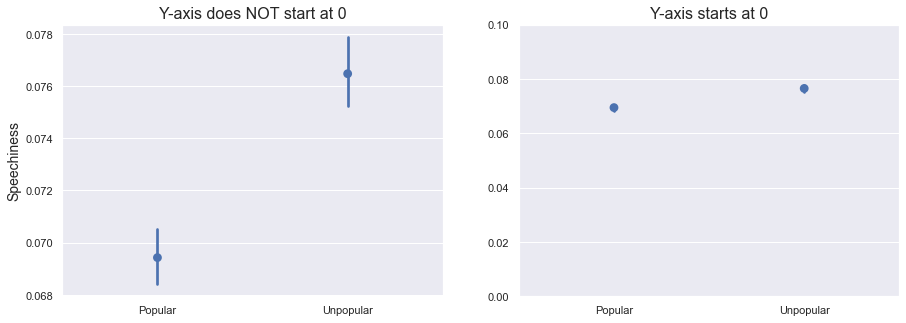

In [154]:
plt.figure(figsize=(15, 5))

# Display plot with truncated y-axis (which doesn't start at 0)
plt.subplot(1, 2, 1)
p = sns.pointplot(data=[popular['speechiness'], 
                        unpopular['speechiness']],
                  join=False)
p.set(xticklabels=['Popular', 'Unpopular'])
plt.ylabel('Speechiness', size=14)
plt.title('Y-axis does NOT start at 0', size=16);

# Display plot with y-axis starting at 0
plt.subplot(1, 2, 2)
q = sns.pointplot(data=[popular['speechiness'], 
                        unpopular['speechiness']],
                  join=False)
q.set(xticklabels=['Popular', 'Unpopular'])
plt.title('Y-axis starts at 0', size=16);
plt.ylim(ymin=0, ymax=.1);

The left plot, which is using the default settings and a truncated y-axis, indicate a very large difference between the two distributions. The right plot, with a y-axis starting at 0, doesn't play tricks on us like that. It's important to be aware of these details when plotting the difference between two groups. The statistical test suggested a small difference - and this should be reflected in the visuals as well. 




<br><br><br>
<br><br><br>


<a name="conclusions"></a>


## [Conclusions](#top)


We've identified several attributes that differ between popular and unpopular songs. With high certainty and fairly large differences, *Instrumentalness*, *Danceability* and *Energy* level are significantly different between the two groups. The difference in both *Duration* and *Speechiness* were statistically significant but fairly small.

There are several caveats regarding the dataset. We don't know under what assumptions it was collected or whether it's representative for songs in general. It contains roughly as many popular as unpopular songs (20k) while it's fair to assume that there are more unpopular than popular songs on the market. We don't know exactly what defines a song as popular. Perhaps the definition is too loose or too restricted. 

Nevertheless, if you feel that most of the songs you're listening to are more *danceable* than not, have high *energy* levels and are most often not *instrumental* - then there's a chance your music would be popular among many others. On the other hand, if you don't recognise yourself listening to that kind of music, you might be more unique. 🙂